# Nishant Srinivasan

## Research Interest

I am interested in analysing the correlation between the the housing prices and the distance to the listed locations to see how price is distributed along California.
And in addition to this, I am also interested in seeing if each of these locations attract members of a certain income level - for example, do people with a higher income live closer to the coast(s)? 

In [1]:
from pandas import *
houses = read_csv('../data/raw/California_Houses.csv')
houses

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0                452600.0         8.3252          41        880           129   
1                358500.0         8.3014          21       7099          1106   
2                352100.0         7.2574          52       1467           190   
3                341300.0         5.6431          52       1274           235   
4                342200.0         3.8462          52       1627           280   
...                   ...            ...         ...        ...           ...   
20635             78100.0         1.5603          25       1665           374   
20636             77100.0         2.5568          18        697           150   
20637             92300.0         1.7000          17       2254           485   
20638             84700.0         1.8672          18       1860           409   
20639             89400.0         2.3886          16       2785           616   

       Population  Households  Latitude  Longitude  Distance_to_coast  \
0             322         126     37.88    -122.23        9263.040773   
1            2401        1138     37.86    -122.22       10225.733072   
2             496         177     37.85    -122.24        8259.085109   
3             558         219     37.85    -122.25        7768.086571   
4             565         259     37.85    -122.25        7768.086571   
...           ...         ...       ...        ...                ...   
20635         845         330     39.48    -121.09      162031.481121   
20636         356         114     39.49    -121.21      160445.433537   
20637        1007         433     39.43    -121.22      153754.341182   
20638         741         349     39.43    -121.32      152005.022239   
20639        1387         530     39.37    -121.24      146866.196892   

       Distance_to_LA  Distance_to_SanDiego  Distance_to_SanJose  \
0       556529.158342         735501.806984         67432.517001   
1       554279.850069         733236.884360         65049.908574   
2       554610.717069         733525.682937         64867.289833   
3       555194.266086         734095.290744         65287.138412   
4       555194.266086         734095.290744         65287.138412   
...               ...                   ...                  ...   
20635   654530.186299         830631.543047        248510.058162   
20636   659747.068444         836245.915229        246849.888948   
20637   654042.214020         830699.573163        240172.220489   
20638   657698.007703         834672.461887        238193.865909   
20639   648723.337126         825569.179028        233282.769063   

       Distance_to_SanFrancisco  
0                  21250.213767  
1                  20880.600400  
2                  18811.487450  
3                  18031.047568  
4                  18031.047568  
...                         ...  
20635             222619.890417  
20636             218314.424634  
20637             212097.936232  
20638             207923.199166  
20639             205473.376575  

[20640 rows x 14 columns]

# Milestone 3

## Task1 : EDA

In [2]:
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [3]:
print(houses.shape)
houses.columns

(20640, 14)


Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
       'Distance_to_SanJose', 'Distance_to_SanFrancisco'],
      dtype='object')

In [4]:
houses.nunique(axis=0)
houses.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

Median_House_Value Median_Income    Median_Age     Tot_Rooms  \
count       20640.000000  20640.000000  20640.000000  20640.000000   
mean       206855.816909      3.870671     28.639486   2635.763081   
std        115395.615874      1.899822     12.585558   2181.615252   
min         14999.000000      0.499900      1.000000      2.000000   
25%        119600.000000      2.563400     18.000000   1447.750000   
50%        179700.000000      3.534800     29.000000   2127.000000   
75%        264725.000000      4.743250     37.000000   3148.000000   
max        500001.000000     15.000100     52.000000  39320.000000   

       Tot_Bedrooms    Population    Households      Latitude     Longitude  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean     537.898014   1425.476744    499.539680     35.631861   -119.569704   
std      421.247906   1132.462122    382.329753      2.135952      2.003532   
min        1.000000      3.000000      1.000000     32.540000   -124.350000   
25%      295.000000    787.000000    280.000000     33.930000   -121.800000   
50%      435.000000   1166.000000    409.000000     34.260000   -118.490000   
75%      647.000000   1725.000000    605.000000     37.710000   -118.010000   
max     6445.000000  35682.000000   6082.000000     41.950000   -114.310000   

      Distance_to_coast  Distance_to_LA Distance_to_SanDiego  \
count      20640.000000    20640.000000         20640.000000   
mean       40509.264883   269421.981646        398164.933494   
std        49140.039160   247732.446134        289400.563735   
min          120.676447      420.589109           484.917973   
25%         9079.756762    32111.253908        159426.394646   
50%        20522.019101   173667.461747        214739.830318   
75%        49830.414479   527156.235384        705795.399035   
max       333804.686371  1018260.119260       1196919.273898   

      Distance_to_SanJose Distance_to_SanFrancisco  
count        20640.000000             20640.000000  
mean        349187.551219            386688.422291  
std         217149.875026            250122.192316  
min            569.448118               456.141313  
25%         113119.928682            117395.477505  
50%         459758.877000            526546.661701  
75%         516946.490963            584552.007907  
max         836762.678210            903627.663298

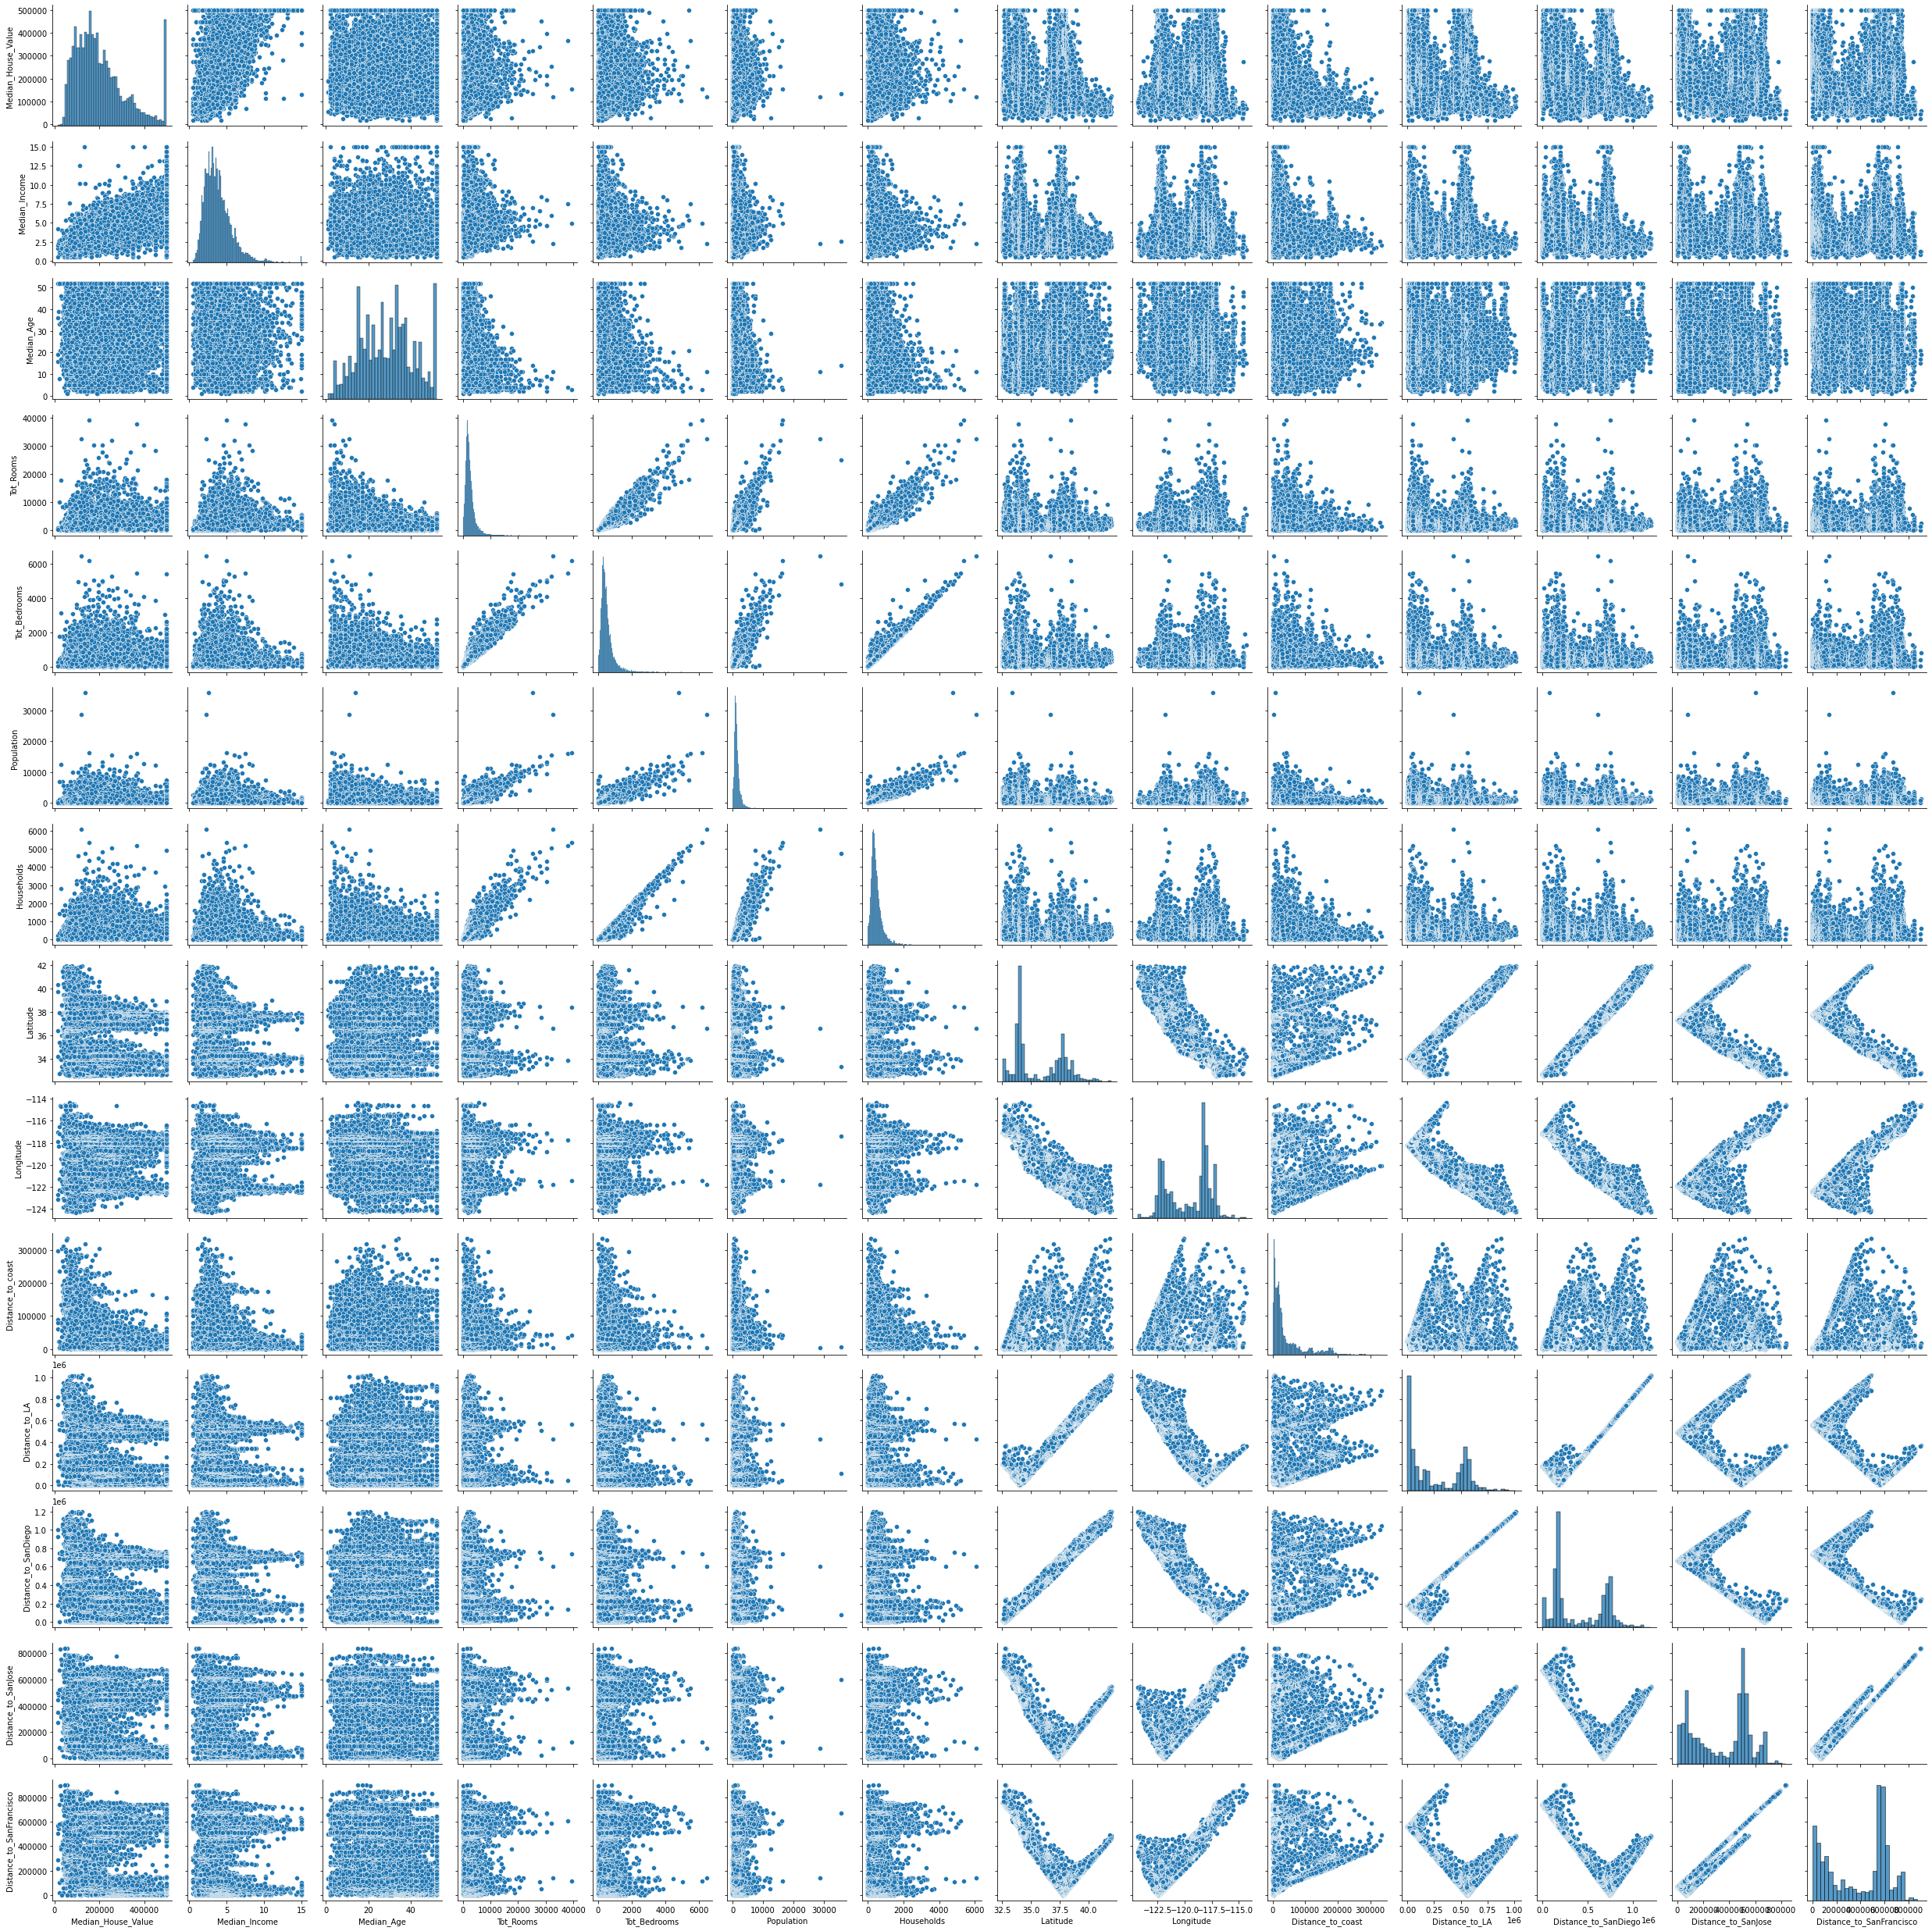

In [5]:
sns.pairplot(houses)

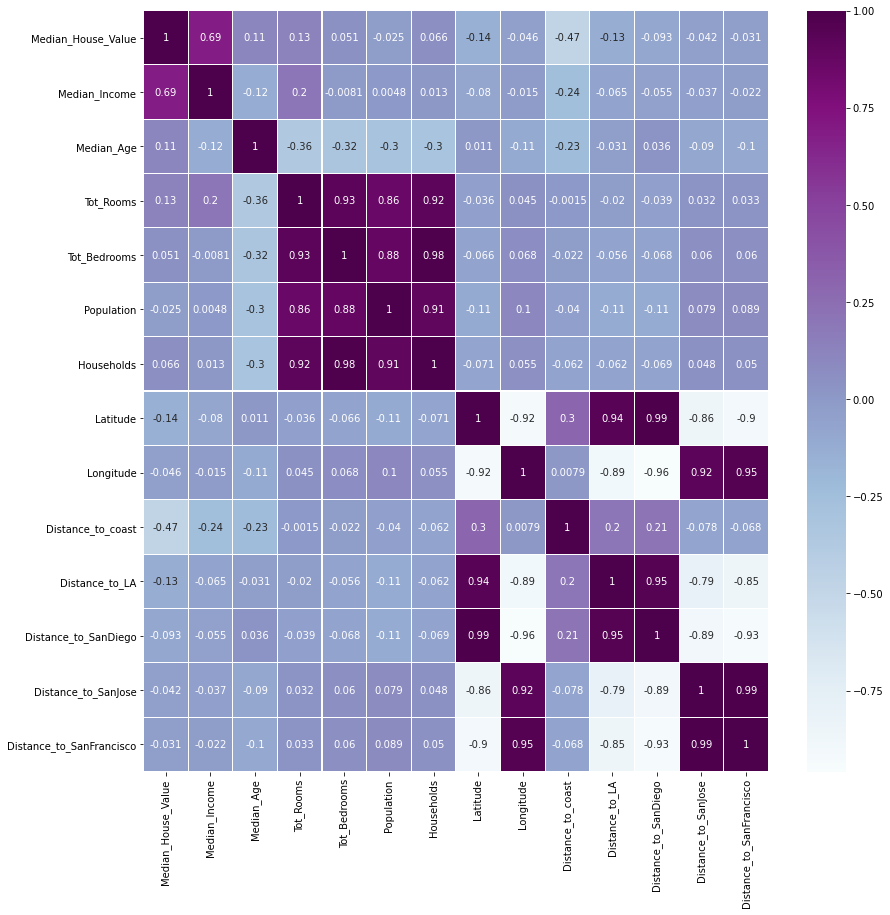

In [6]:
plt.figure(figsize=(14,14))
sns.heatmap(houses.corr(),linewidths=.1,cmap="BuPu", annot=True)
plt.yticks(rotation=0);

Unfortunately, the correlations between a lot of the variables are not that strong. The only exceptions where there is a strong correlation are cases where it is redundant ; latitude vs. distance to LA, distance to San Jose vs. distance to San Diego, or latitude vs longitude and so on.

##### *Want to see if reducing sample size leads to a clearer picture*

In [7]:
np.random.seed(20639)

remove_n = 19639
drop_indices = np.random.choice(houses.index, remove_n, replace=False)
houses_subset = houses.drop(drop_indices)

houses_subset

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
22               113900.0         1.7250          52       2436           541   
25               107500.0         2.4038          41        535           123   
40               155400.0         2.0978          52       1665           419   
70                82500.0         1.7719          26        768           152   
86               118800.0         0.9770          40        880           451   
...                   ...            ...         ...        ...           ...   
20582             92700.0         3.7574          33       1221           236   
20590             71300.0         1.6840          41       1492           350   
20594             84700.0         3.7250          21       1872           302   
20605             61200.0         1.8355          26       2796           629   
20613             53400.0         1.4958          31       1728           365   

       Population  Households  Latitude  Longitude  Distance_to_coast  \
22           1015         478     37.84    -122.27        5976.288058   
25            317         119     37.85    -122.28        6781.863175   
40            946         395     37.83    -122.26        5427.301746   
70            392         127     37.81    -122.29        2249.485926   
86            582         380     37.81    -122.27        3162.273012   
...           ...         ...       ...        ...                ...   
20582         488         199     38.90    -122.16       86350.803761   
20590         804         353     39.14    -121.59      117470.142866   
20594         870         301     39.16    -121.57      119750.930702   
20605        2017         632     39.12    -121.58      115273.737331   
20613        1167         384     39.09    -121.55      112062.861046   

       Distance_to_LA  Distance_to_SanDiego  Distance_to_SanJose  \
22      555535.931448         734392.514954         65195.936186   
25      556949.957896         735808.166775         66600.759039   
40      554121.830231         732976.783933         63791.604910   
70      554238.609914         733014.532597         63308.967201   
86      553058.019949         731864.734425         62352.244305   
...               ...                   ...                  ...   
20582   642634.048116         821909.229132        175527.142687   
20590   639636.088934         817839.040212        202390.932977   
20594   640757.299244         818884.380208        204828.624886   
20605   637272.067427         815485.147400        200304.169088   
20613   633101.402158         811297.155173        197381.711904   

       Distance_to_SanFrancisco  
22                 15959.483657  
25                 15751.793975  
40                 16288.476117  
70                 13046.186720  
86                 14728.583289  
...                         ...  
20582             127424.641109  
20590             168634.941987  
20594             171390.913540  
20605             167023.788364  
20613             165245.680953  

[1001 rows x 14 columns]

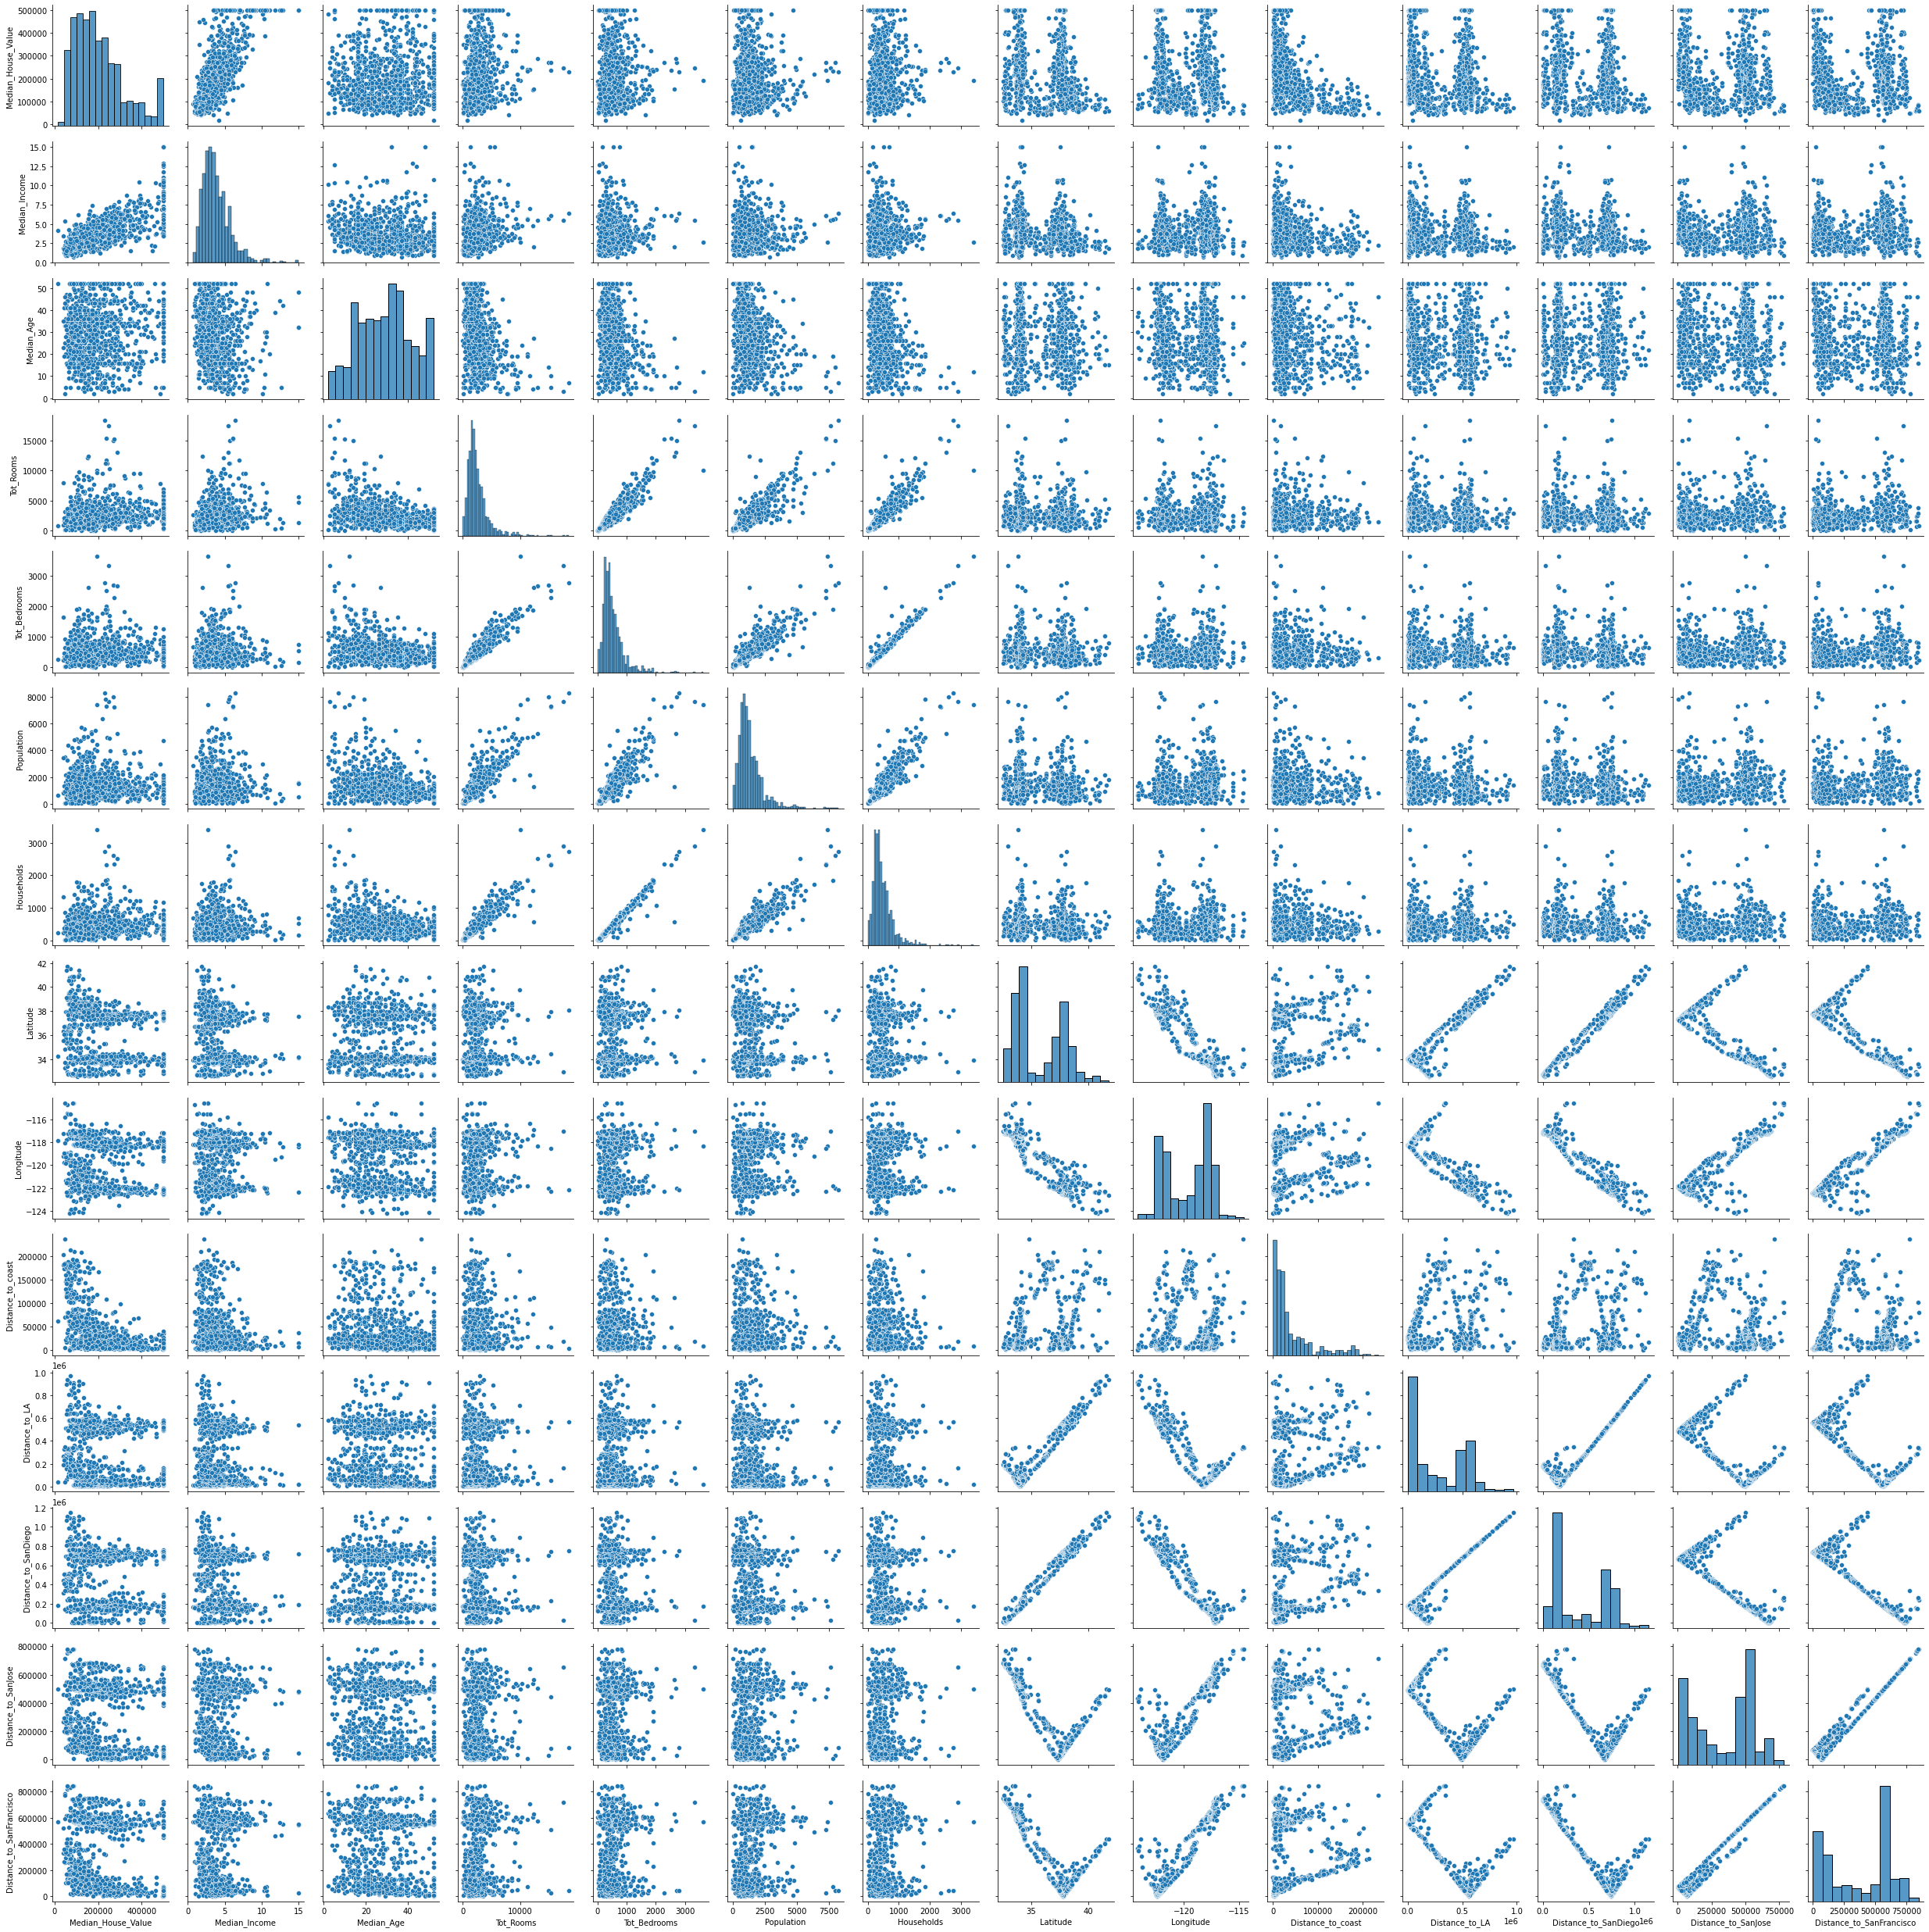

In [8]:
sns.pairplot(houses_subset)

#### Median House Value vs. Distance to :LA,SF,nearest coast

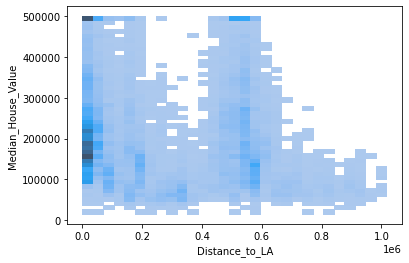

In [9]:
laphouse = sns.histplot(houses,x='Distance_to_LA',y='Median_House_Value')

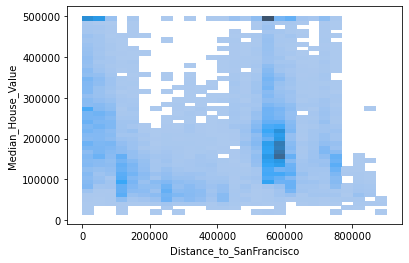

In [10]:
sfhouse = sns.histplot(houses,x='Distance_to_SanFrancisco',y='Median_House_Value')

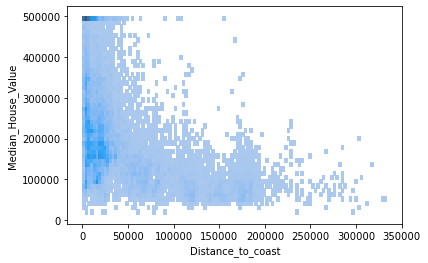

In [11]:
coasthouse = sns.histplot(houses,x='Distance_to_coast',y='Median_House_Value')

#### Median Income vs. Distance to :LA,SF,nearest coast

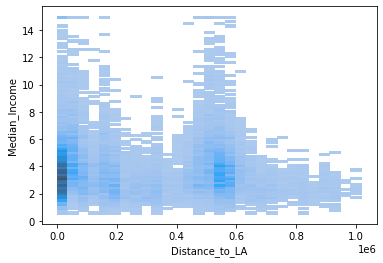

In [12]:
lapincome = sns.histplot(houses,x='Distance_to_LA',y='Median_Income')

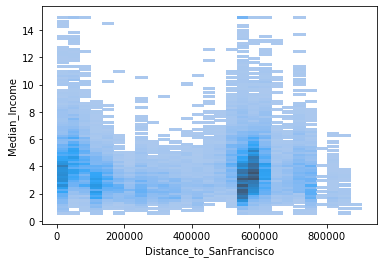

In [13]:
lapincome = sns.histplot(houses,x='Distance_to_SanFrancisco',y='Median_Income')

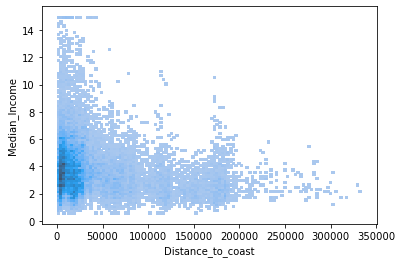

In [14]:
lapincome = sns.histplot(houses,x='Distance_to_coast',y='Median_Income')

#### Observations
It is interesting to note that the relationship between the median houseprice in each block of our dataset and the distances to LA and San Francisco look so identicial. Similarly, the relationship between the median income in each block of our dataset and the distances to LA and San Francisco look extremely identicial.

The prices all remain relatively high when they are somewhat closer to these locations, but then tend to dip down significantly with increasing distance.

Since, we do not know which direction the distances are measured in, they most likely radiate away from these cities in 360 degrees. Based on this, what we can tell for sure is that the closer a house is to one of the 4 cities mentioned, the more expensive it is.

Unlike the prices, the average income is a lot less distributed with distance and is more concentrated within the regions that are the closest to both cities. This is interesting to note because housing prices remain high in many areas where the average income per block does not seem to be as high compared to areas much closer to the cities.

The distance to LA and SF seem to have a minimal, but rather a little unclear, impact on the median house value and the median income. The pattern is not as prevalent as it is in the graphs comparing the distance to coast and the median income & median house values. The distance to the nearest coast seems to have a much stronger relationship with both the median income, and the median house value- both tend to decrease steadily with increasing distance from the nearest coast.

## Task 2 : Pipeline

#### 1. Load

In [15]:
houses = read_csv('../data/raw/California_Houses.csv')

#### 2. Clean

In [16]:
houses_cleaned = houses.drop(['Median_Age','Tot_Rooms','Tot_Bedrooms','Households','Latitude','Longitude','Population','Distance_to_SanDiego','Distance_to_SanJose'],axis='columns')
houses_cleaned = houses_cleaned.rename(columns = {
    'Median_House_Value' : 'med_price',
    'Median_Income' : 'med_income',
    'Distance_to_coast' : 'coast_dist',
    'Distance_to_LA' : 'la_dist',
    'Distance_to_SanFrancisco' : 'sf_dist'
})

print(houses_cleaned)

# checks for missing data
np.isnan(houses.values).any()

       med_price  med_income     coast_dist        la_dist        sf_dist
0       452600.0      8.3252    9263.040773  556529.158342   21250.213767
1       358500.0      8.3014   10225.733072  554279.850069   20880.600400
2       352100.0      7.2574    8259.085109  554610.717069   18811.487450
3       341300.0      5.6431    7768.086571  555194.266086   18031.047568
4       342200.0      3.8462    7768.086571  555194.266086   18031.047568
...          ...         ...            ...            ...            ...
20635    78100.0      1.5603  162031.481121  654530.186299  222619.890417
20636    77100.0      2.5568  160445.433537  659747.068444  218314.424634
20637    92300.0      1.7000  153754.341182  654042.214020  212097.936232
20638    84700.0      1.8672  152005.022239  657698.007703  207923.199166
20639    89400.0      2.3886  146866.196892  648723.337126  205473.376575

[20640 rows x 5 columns]


False

#### 3. Process

In [17]:
houses_cleaned["med_income"] = 10000 * houses_cleaned["med_income"]
houses_cleaned["coast_dist"] = (1/1000) * houses_cleaned["coast_dist"]
houses_cleaned["la_dist"] = (1/1000) * houses_cleaned["la_dist"]
houses_cleaned["sf_dist"] = (1/1000) * houses_cleaned["sf_dist"]

houses_cleaned

med_price  med_income  coast_dist     la_dist     sf_dist
0       452600.0     83252.0    9.263041  556.529158   21.250214
1       358500.0     83014.0   10.225733  554.279850   20.880600
2       352100.0     72574.0    8.259085  554.610717   18.811487
3       341300.0     56431.0    7.768087  555.194266   18.031048
4       342200.0     38462.0    7.768087  555.194266   18.031048
...          ...         ...         ...         ...         ...
20635    78100.0     15603.0  162.031481  654.530186  222.619890
20636    77100.0     25568.0  160.445434  659.747068  218.314425
20637    92300.0     17000.0  153.754341  654.042214  212.097936
20638    84700.0     18672.0  152.005022  657.698008  207.923199
20639    89400.0     23886.0  146.866197  648.723337  205.473377

[20640 rows x 5 columns]

#### 4. Wrangle
N/A

## Task 3 : Method Chaining

In [18]:
def load_and_process(path):
    
#     get rid of unused columns, rename existing ones into more convenient names
    
    df_clean = (
        read_csv(path)
        .drop(['Median_Age','Tot_Rooms','Tot_Bedrooms','Households','Latitude','Longitude','Population','Distance_to_SanDiego','Distance_to_SanJose'],axis='columns')
        .rename(columns = {
        'Median_House_Value' : 'med_price',
        'Median_Income' : 'med_income',
        'Distance_to_coast' : 'coast_dist',
        'Distance_to_LA' : 'la_dist',
        'Distance_to_SanFrancisco' : 'sf_dist'
        })
    )

#     convert distances from meters to km, convert income from 10,000's to dollars
    df_units_converted = (
        df_clean.apply(lambda x: x*10000 if x.name == "med_income" else x)
        .apply(lambda x: x/1000 if x.name == "la_dist" or x.name == "sf_dist" or x.name == "coast_dist" else x)
    )
    
    return df_units_converted

load_and_process('../data/raw/California_Houses.csv')

med_price  med_income  coast_dist     la_dist     sf_dist
0       452600.0     83252.0    9.263041  556.529158   21.250214
1       358500.0     83014.0   10.225733  554.279850   20.880600
2       352100.0     72574.0    8.259085  554.610717   18.811487
3       341300.0     56431.0    7.768087  555.194266   18.031048
4       342200.0     38462.0    7.768087  555.194266   18.031048
...          ...         ...         ...         ...         ...
20635    78100.0     15603.0  162.031481  654.530186  222.619890
20636    77100.0     25568.0  160.445434  659.747068  218.314425
20637    92300.0     17000.0  153.754341  654.042214  212.097936
20638    84700.0     18672.0  152.005022  657.698008  207.923199
20639    89400.0     23886.0  146.866197  648.723337  205.473377

[20640 rows x 5 columns]

#### Load from python module

In [19]:
from project_functions3 import * 
url_or_path_to_csv_file = '../data/raw/California_Houses.csv'
df = load_and_process(url_or_path_to_csv_file)
df
df.to_csv('../data/processed/California_Houses_3.csv')

## Task 4 : Analysis

Original Research Questions:

1. Correlation between housing prices and the distance to LA,SF,and the nearest coast to see how price is distributed geographically

2. Correlation between income levels and the distance to LA,SF,and the nearest coast to see how the population is distributed by income geographically

Change(s) to my research questions:
    
N/A - Based on the correlational analaysis from the heatmap I produced, there appear to be no stronger correlations between any other combinations of variables, therefore I will not be adding any research questions to my existing 2.

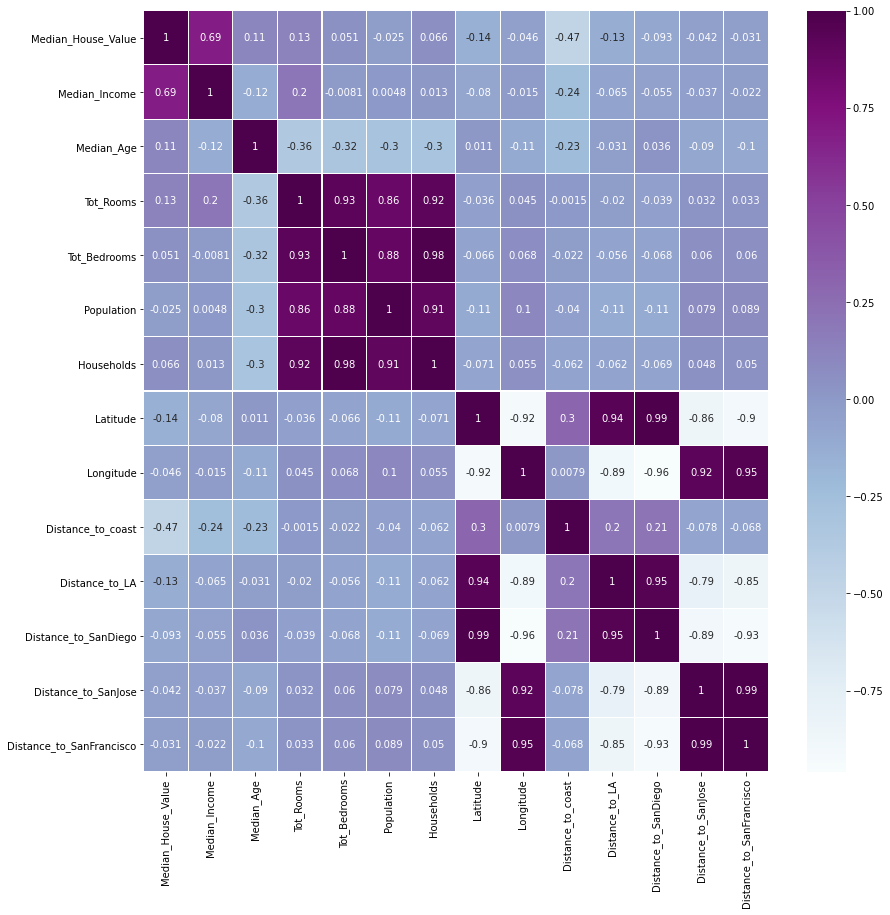

In [99]:
plt.figure(figsize=(14,14))
sns.heatmap(houses.corr(),linewidths=.1,cmap="BuPu", annot=True)
plt.yticks(rotation=0);

1. Correlation between housing prices and the distance to LA,SF,and the nearest coast to see how price is distributed geographically

Initially, my hypothesis was that in general, housing prices will tend to be lower the further you are from a big city such as Los Angeles or San Francisco.

This proved to be somewhat true, however the data visualizations would indicate that the correlation between these variables are not as strong as I had initially expected them to be.

- Housing Price vs Distance to LA : -0.13
- Housing Price vs Distance to SF : -0.031

From a statistical perspective, these numbers would go on to suggest that there is not really as much of a correlation between the variables , if any, at all.

However, I was surprised to discover that the distance to the nearest coast did have a much stronger correlation than I had anticipated.

- Housing Price vs Distance to nearest coast : -0.47

The figure for the relationship above was a lot less vague in terms of visual patterns compared to the other two, and seemed to exhibit a general decline with increasing distance.

Hence, my original hypothesis that housing prices tend to be greater the closer they are to Los Angeles or San Francisco has been disproven.

2. Correlation between income levels and the distance to LA,SF,and the nearest coast to see how the population is distributed by income geographically

The figures and relationships I used to answer this question are very similar to my previous research question.

I had no hypothesis as to whether or not income varied by geography, since it is one of those things where multiple variables play a factor. 
However, I found it interesting that similar to last time, income had a higher correlation with the distance to the coast than than it did with
the other 2 cities.

- Income vs Distance to LA : -0.065
- Income vs Distance to SF : -0.031
- Income vs Distance to coast : -0.24

Again, statistically, none of these values can be used to prove any sort of causality or correlation, hoowever, it was just interesting to note that the distance to the coast seems to have a lot more impact on both 
the average housing price and income in comparison to the dsitance to both LA and San Francisco.